# Recap

## Intro to DB

**Different type of Databases:**
* Centralized
* Distributed
* Relational
* NoSQL
 * Document-Oriented
 * Graph
 * Wide-Column
* Cloud
* Operational
* Object-Oriented
* Commercial
* Personal

**Terminology:**
* ACID (Atomicity, Consistency, Isolation and Durability)
* Client/Server
* Connection
* Cursor
* Database Definition Language (DDL)
* Data Manipulation Language (DML)
* Data Control Language (DCL)
* Primary Key or _id
* Transaction Control Language (TCL)

**Different data storage formats:**
* Comma Separated Values (CSV)
* Extensible Markup Language (XML)
* JavaScript Object Notation (JSON)
* Databases

**Data Acquisition:**
* how data can be obtained?
 * we have seen 1 way, using a Web Scrapper (Python Case Study)

**Data Preprocessing:**
* Data Validty vs Data Integrity
 * **Data Validty** - the data has undergone a strict set of rules to ensure that it is correct and useful.
 * **Data Integrity** - overall completeness, accuracy and consistency of data.
* Things that can go wrong with data
 * Missing Data
 * Duplicated Data
 * Errors Correction 

---

## Topics
* Data Processing
* Transactional Processing
* Intro to RDBMS Part 1

---

# Data Processing

Done after validation, integrity checks and cleaning. What are the ways data can be processed:
* **Parsing** - These are software (generally open sourced) that helps with extracting specific data from raw data and place them into a format that for use on the destination system. <br>
  
  **Example:** The HTML Parser used in `Beautiful Soup`. <br>
  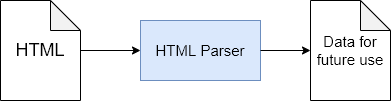
  
* **Transformation** - mapping of data from a given format to another format that is applicable or expected by another application.<br>
  
  **Example:** Joining of data from multiple tables to produce new data for another application.<br>
  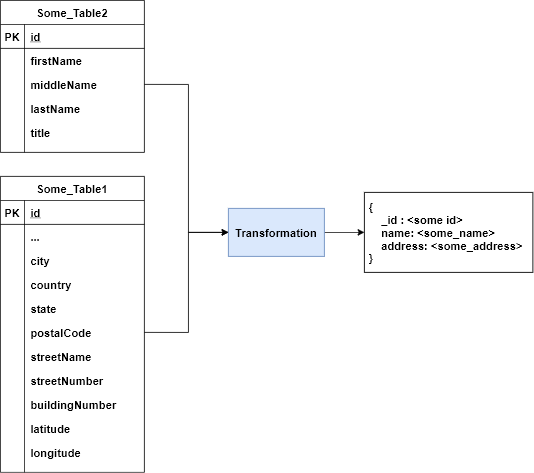

* **Aggregation** - a technique for summarizing data.<br>
  
  **Example:** Aggregation pipeline of Hardware Assisted Trace from [Ericsson](https://link.springer.com/article/10.1007/s00607-018-0679-5).<br>
  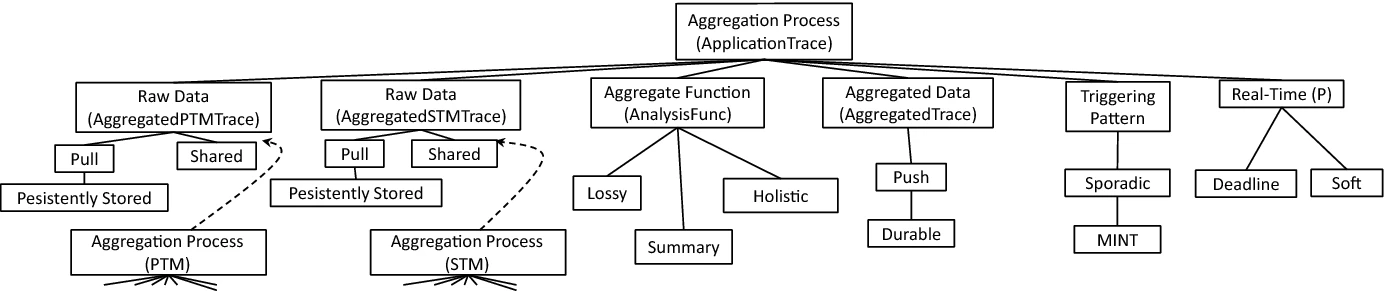

* **Analysis** - concerns the use and nature of data. After data is processed we can organize the data either via relations or via documents to see how the data is logically linked to each other.

  **Example:**  Entity Relationship (ER) diagrams for Relational Databases.<br>
  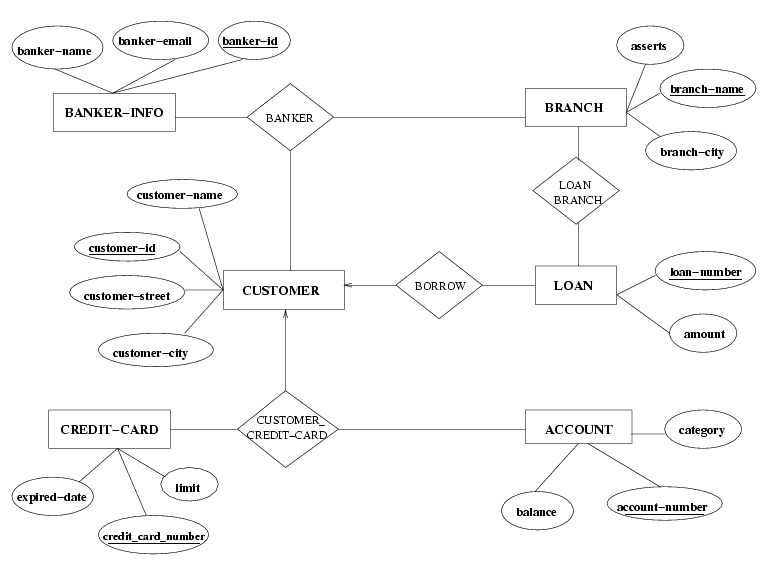

# Transactional Processing

Process of completing a collection of different interrelated tasks and/or processes that must work in sync to finish an overall business process transaction. Examples include payment of goods from an online store or money transfers using an ATM.

| 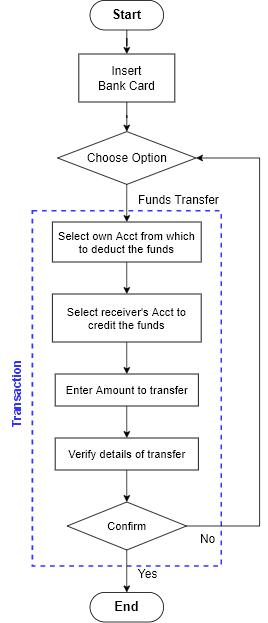 | Main operations required for Money Transfer<br><ul><li>Entering correct sender's account type</li><li>Entering correct receiver's account number</li><li>Entering correct amount to transfer</li></ul> If any step is wrong, <u>all operations must fail</u>. This is called <i>Rollback</i>.<br><br>If all steps have been verified correct, <u>all operations are successful</u> and will be <i>committed</i> to the system. |
|:---:|:---|

These transactions must adhere to 4 properties that are intended to guarantee validity in the event of failures. The properties are called **ACID** or **Atomicity**, **Consistency**, **Isolation** and **Durability**.

### Atomicity
Atomicity guarantees that each transaction are treated as a **single unit** therefore all operations are to be completed successfully or all will fail completely, there are no partial transactions. This holds true in the event of
* power failures or crashes
* attempted cross viewing of ongoing transactional data unless a transaction has been committed


### Consistency
Ensures that a transaction can only take the database from one consistent state to another. For example, we have a database that records the number of likes for a tweet (like the picture below)

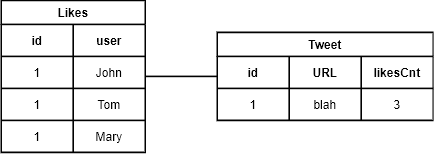

Consistency would be broken when the total number of likes for a particular tweet is **not the same** as the `likesCnt` in the `Tweet` table.


### Isolation
This means that other transactions occuring in at the same time as the current transaction will not be able to *see* the operations of the current transaction. For example the 2 transactions below

| &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; T<sub>1</sub> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;| &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; T<sub>2</sub> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; |
|:---:|:---:|
| Read(x) | Read(x) |
| x = x + 1 | x = x * 2 |
| Write(x) | Write(x) |
| Commit | Commit |

Some possible execution sequences are as follows:

| &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Sequence 1 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; | &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Sequence 2 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; | &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Sequence 3 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; |
|:---:|:---:|:---:|
| T<sub>1</sub>: Read(x) | T<sub>1</sub>: Read(x) | T<sub>2</sub>: Read(x) |
| T<sub>1</sub>: x = x + 1 | T<sub>1</sub>: x = x + 1 | T<sub>1</sub>: Read(x) |
| T<sub>1</sub>: Write(x) | T<sub>2</sub>: Read(x) | T<sub>1</sub>: x = x + 1 |
| T<sub>1</sub>: Commit | T<sub>1</sub>: Write(x) | T<sub>2</sub>: x = x * 2 |
| T<sub>2</sub>: Read(x) | T<sub>2</sub>: x = x * 2 | T<sub>1</sub>: Write(x) |
| T<sub>2</sub>: x = x * 2 | T<sub>2</sub>: Write(x) | T<sub>1</sub>: Commit |
| T<sub>2</sub>: Write(x) | T<sub>1</sub>: Commit | T<sub>2</sub>: Write(x) |
| T<sub>2</sub>: Commit | T<sub>2</sub>: Commit | T<sub>2</sub>: Commit |

### Durability
Writing of committed data to a non-volatile memory so that it will remain safe even in the event of a system failure.

## CAP Theorem
As we move towards generating and storing more data, distributed systems becomes more and more common place. Origanizations then have to decide whether to scale their database systems vertically or horizontally.
* Vertical scaling - means to get better hardware and optimize existing code bases for that specific hardware.
* Horizontal scaling - means to get more machines to perform the same tasks in parallel.

In today's context it is generally easier and more cost effective to scale horizontally than vertically but then we would need a tool to effectively manage thoes machines. To properly choose a tool we need to understand the **CAP Theorem** (Consistency, Availability and Partition tolerance).

> The CAP Theorem states that: <br>
> **It is impossible for a distributed data store to simultaneously provide more than two of
three desirable properties.**


**Consistency**
This condition requires all nodes to be able to see the same data at the same time. This means if a *read* operation has been performed, the most recent *write* operation's data is to be returned by all nodes. **However**, databases will need time to update all the nodes after any transaction as been committed therefore within this period it is in an inconsistent state.

**Availability**
This condition states that every request receives a non-error (meaning success or failure) response from **every node** regardless of the state of each node in the system within a reasonable amount of time. This requires every node on the system to be operational 100% of the time. 

**Partition tolerance**
This condition states that a system will continue to run despite any number of messages being dropped or delayed by the network between nodes (machines). That also means that the system is able to sustain any number of network failures so long as it does not result in the failure of the whole network. The property is normally guaranteed in distributed systems.

Even thought the CAP Theorem states that it is impossible to choose between 2 of 3 the desirable properties, it is more of a **balancing act than a forfeit**. In distributed systems, the property *Partition Tolerance* is already guaranteed therefore we would need to balance between the other 2 properties. **Note that NoSQL databases prioritizes availability before consistency and RDBMS does the opposite.**

---
# Introduction to Database Management System (DBMS)

What is a Database Management System? 

> From Oxfoxd Dictionary:<br>
> **It is s software that handles the storage, retrieval, and updating of data in a computer system.**

In reality, it is actually quite a large software package that integrates a bunch of programs that is designed to help create and maintain databases. It's main goal is to provide a convenient and effective method of defining, storing, retrieving, and manipulating the data contained in the database.

A DBMS can be broken down into the following key functions:
* **Software** - the management console or interface that users or applications use to interact with and manage the databases. This interface works together with the operating system, networking systems and hardware infrastructure to manage the databases.

 **Example:** OmniDB GUI client for PostgresDB<br>
 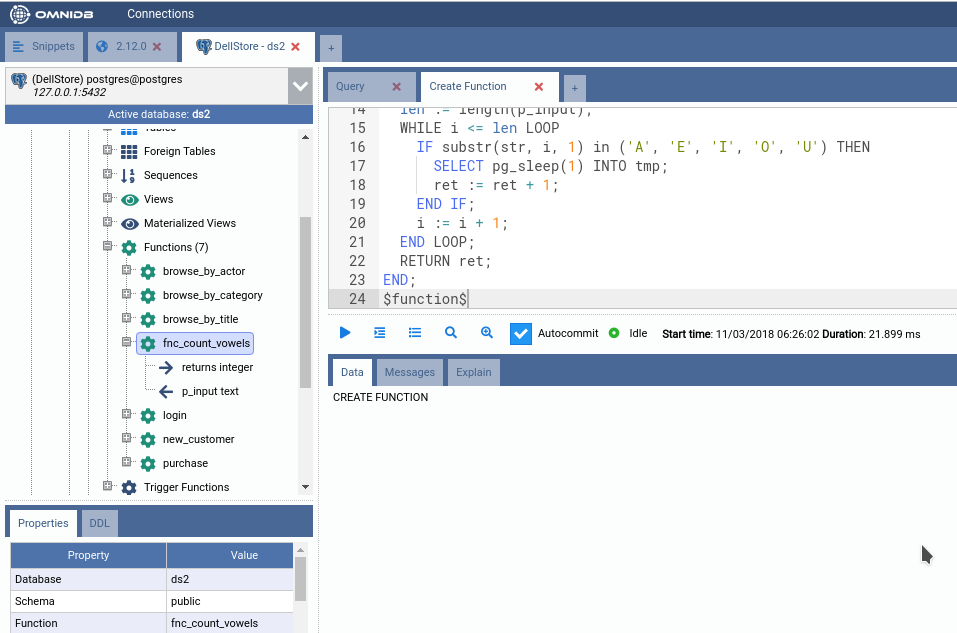
 
* **Data** - this is the operational data kept by the DBMS as a resource for it to perform the required operations.
 
 **Example:** MariaDB comes with some preloaded databases out of the box<br>
 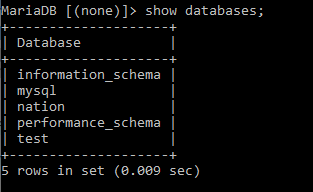
 
* **Procedures** - are the physical documentation of the DBMS that details the designing, modifying, managing and processing of the databases available to the users.

* **Database language** - these are the components of the DBMS that are used for database management operations such as control user access, specify database schema, manipulate databases, etc. There are different classification of languages such as Data Definition Language (DDL), Data Manipulation Language (DML) and Data Control Language (DCL) to name a few.

* **Query processor** - an integral part of a DBMS as it acts as a middle man between the users and the database engine in order to communicate the query requests. The queries gets translated from a high-level language to a low-level language so that the DBMS can execute the function. 

* **Runtime database manager** - this component handles functions that deals with runtime data which is used mainly for context-based database access. It does tasks like checking for user authorization, supports concurrency for multiple users working on the same databases, etc.

* **Database manager** - unlike the runtime database manager, this component handles the DBMS functionalities associated with the data within the databases and the general maintenance of the databases. Examples of some of the operations are creating, deleting, backing up, restoring and cloning of the data and/or database.

* **Database engine** - the core of the DBMS deal with how the data should structured such that it can be efficiently read from and written to based on the machine's hardware upon which the DBMS has been installed. It also provides an API library for various programming languages to allow users to interact with it.

* **Reporting** - this component generates structured information based on the defined specifications from the DBMS files. This information can then be used for further analysis or decision making.

<br>

In a nutshell a DBMS can be seen as the middle man between the users or applications or other DBMS and their databases.<br>
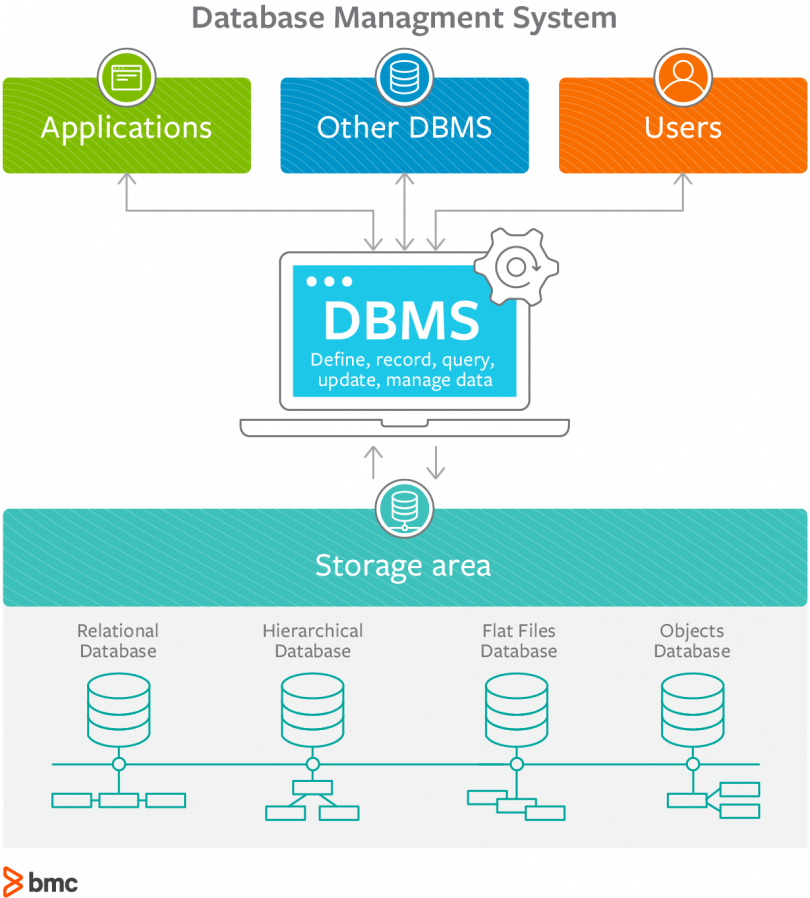


## Types of DBMS
Previously we have seen different types of databases now we shall see different types of DBMS.

* **Flat file** - earliest form of computerized data management. A file in this data management system is a set of data structured so that it can be stored on a long term storage media such a disk or magnetic tape. The data is written via a moving read/write head in blocks followed by a gap between the blocks.

 **Example:** IBM 701 Electronic Data Processing System (1952)<br>
 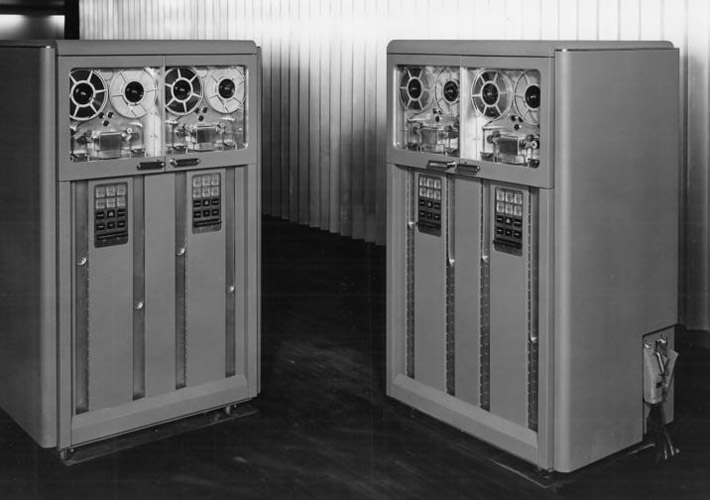
 
* **Hierarchical** - this model resembles a tree structure, similar to the folder structure of your computer system. Each record is has a 1 to 1 relationship of the parent node directly preceding it. This DBMS were used in early mainframe systems like the IBM's Information Management System (IMS).
 
 **Example:** Hierachical DBMS Model<br>
 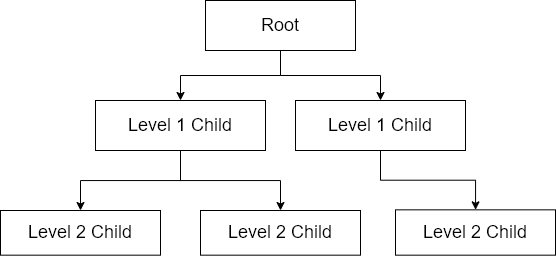

* **Network** - this model is similar to the hierarchical DBMS as it is a modified version of it. This model organizes data into a graph format and each child can have more than 1 parent node. Used for mainframes and minicomputers like the Integrated Database Management System (IDMS) for mainframes by CA Technologies.
 
 **Example:** Network DBMS Model<br>
 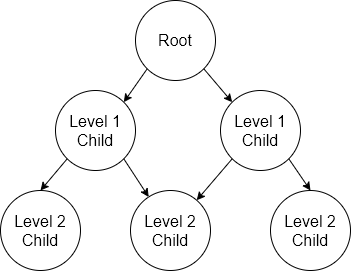

* **Relational** - this DBMS is used to maintain relational data and the DBMS is often called relational database management system (RDBMS). Data is organized a rows and columns structure called a table and the relationships between tables are maintained by storing a common field from the other table. Uses the Structured Query Language (SQL) for querying and maintaining the databases.
 
 **Example:** RDBMS storing relational databases<br>
 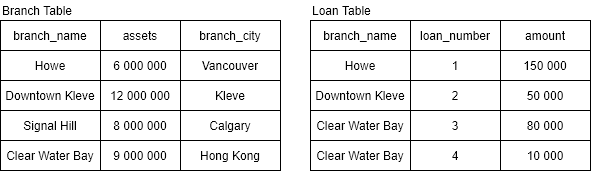